In [1]:
import pandas as pd
import csv
import os
base = '/opt/ml/input/data/train/'
csv_path = os.path.join(base, 'train.csv')
img_path = os.path.join(base, 'images')

In [1]:
import glob

base = '/opt/ml/input/data/train/images/'
jpg = glob.glob(base + '**/*.jpg', recursive=True)
png = glob.glob(base + '**/*.png', recursive=True)
jpeg = glob.glob(base + '**/*.jpeg', recursive=True)

print(len(jpg) + len(png) + len(jpeg))

18900


In [3]:
src = base = '/opt/ml/input/data/train/images/'

for idx, img in enumerate(glob.glob(src + '**/*.*', recursive=True)):
    dir_name, ext = os.path.splitext(img)
    is_masked = dir_name.split('/')[-1]
    etc = dir_name.split('/')[-2].split('_')
    features = [is_masked[0], etc[1], int(etc[3])]
    print(etc)

    if idx > 10 : break

['001108', 'female', 'Asian', '23']
['001108', 'female', 'Asian', '23']
['001108', 'female', 'Asian', '23']
['001108', 'female', 'Asian', '23']
['001108', 'female', 'Asian', '23']
['001108', 'female', 'Asian', '23']
['001108', 'female', 'Asian', '23']
['001817', 'male', 'Asian', '23']
['001817', 'male', 'Asian', '23']
['001817', 'male', 'Asian', '23']
['001817', 'male', 'Asian', '23']
['001817', 'male', 'Asian', '23']


In [2]:
base = '/opt/ml/input/'
src = os.path.join(base, 'data/eval')

tot = len(glob.glob(src + '/images/' + '**/*.*', recursive=True))
# for idx, img in enumerate(glob.glob(src + '/images/' + '**/*.*', recursive=True)):
#     dir_name, ext = os.path.splitext(img)
#     # print(f'{dir_name.split("/")[-1]}.{ext}')
print(tot)

12600


18900

In [5]:
from PIL import Image
%matplotlib inline
from matplotlib.pyplot import imshow
import numpy as np

all_img = glob.glob(src + '**/*.*', recursive=True)

print(type(all_img[0]))
img = Image.open(all_img[0])
# imshow(np.asarray(img))

<class 'str'>


In [92]:
from torchvision.io import read_image
from torchvision import transforms

def get_transforms_img(im):
    # im = torchvision.transforms.Resize((224,224))(im)
    # im = torchvision.transforms.RandomHorizontalFlip()(im)
    # im = torchvision.transforms.CenterCrop((150,150))(im)

    im = transforms.Compose([
                        transforms.CenterCrop((300,300)),
                        transforms.Resize((32,32)),
                        # transforms.RandomHorizontalFlip(),
    ])(im)
    
    return im
i = 0

torch.Size([3, 512, 384])


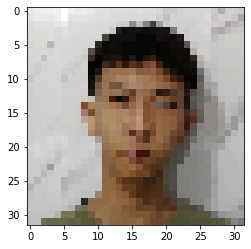

In [101]:
i += 1
img = read_image(all_img[i])
print(img.shape)
img = get_transforms_img(img)
imshow(np.asarray(img).transpose((1,2,0)))

In [8]:
dataframe = pd.read_csv(csv_path)
dataframe


,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59
...,...,...,...,...,...
2695,006954,male,Asian,19,006954_male_Asian_19
2696,006955,male,Asian,19,006955_male_Asian_19
2697,006956,male,Asian,19,006956_male_Asian_19
2698,006957,male,Asian,20,006957_male_Asian_20


In [11]:
list_dir = os.listdir(img_path)
real_dir = []
for d in list_dir:
    if d.find('._')==-1:
        real_dir.append(d)

In [30]:
dataframe[['id', 'gender']]

,id,gender
0,000001,female
1,000002,female
2,000004,male
3,000005,female
4,000006,female
...,...,...
2695,006954,male
2696,006955,male
2697,006956,male
2698,006957,male


In [28]:
len(real_dir)
pd.to_numeric(dataframe['id']).values

ValueError: Unable to parse string "000600-1" at position 207

In [19]:
import torch
torch.tensor(dataframe['id'].values, dtype=torch.float32)

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.